# Building a language model

Here we'll be loading the cleaned text and doing some statistical analysis. Afterwards, we will build a set of word vectors from the cleaned corpus.

In [1]:
import os, re
import pickle
import warnings
import itertools as it
from collections import Counter
import umap as UMAP
from multiprocessing import cpu_count

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from_scratch = True

In [3]:
nupepa_sents_file = "../data/nupepa.txt"
with open(nupepa_sents_file, "r", encoding = 'utf-8') as f:
    nupepa_sents = f.read().strip().split("\n")

In [4]:
nupepa_sents[:10]

['ka ahailono a ka lahui ',
 'i. honolulu ',
 'no ',
 '',
 '',
 'waialua mokupuni o oahu e hoomana i ko lakou kumukanawai a me na ma ka la mua o e hiki mai ana ',
 '',
 'ke kauoha ia aku nei na mea a pau i loaa ole ke kuleana iloko o ka aina hui o waimea e lawe i ko lakou mau holoholona a pau e hele ana maluna o na aina la iloko o na la he kanakolu mai keia la aku a o na holoholona kuleana ole a pau i ike ia e hele ana maluna o ke ahupuaa o waimea mahope iho o ka hala ana o na la he kanakolu e manao ia he mau holoholona hele hewa lakou e hopu ia a e koi ia i hookahi no ke poo a i ole e lawe ia i ka pa aupuni a e na holoholona a pau i kuni ole ia i ka hao e manao ia no ka hui ponoi no ia mau holoholona ',
 'mahaulu a luna nui o ka hui aina ahupuaa o waimea ',
 'waialua ']

## N-grams

In [5]:
from nltk import ngrams
from nltk import word_tokenize

In [6]:
list(ngrams(word_tokenize("Hello there my friend"), 3))

[('Hello', 'there', 'my'), ('there', 'my', 'friend')]

In [7]:
warnings.filterwarnings('ignore')
ngram_length = 4
ngram_list = []
for text in nupepa_sents:
    sent = word_tokenize(text)
    for ngram in ngrams(sent, ngram_length):
        ngram_list.append(ngram)

## Gensim

We will use the `gensim` library to analyse the text further.

In [8]:
from gensim.models.phrases import Phrases
from gensim.models.word2vec import LineSentence

In [9]:
unigram_sentences = LineSentence(nupepa_sents_file)

In [10]:
for unigram_sentence in it.islice(unigram_sentences, 230, 240):
    print(u' '.join(unigram_sentence))
    print(u'')

haalele aku la laua ia wahi a hoomau aku la i ka laua hele ana imua a no kekahi manawa hoea aku la laua i kekahi heiau nai e ku ana

e huli ana ke alo o keia hale i ke kulanakauhale ponoi o kahema

aka o na keena o loko e ua heiau la e huli ana ia i ka muliwai

o keia kekahi o na halepule kahiko loa a ua kukulu ia ma ke ano paa loa i piha ma ka nani

o ka pohaku eleele o ka aina kaulana o oia ka pohaku a ua kahakahaia hoi na kii like ole o kela a me keia ano ma na paia a puni o ua hale la

eia iloko o keia hale e noho nei ke akua wahine pahi a i kamailio mai ai i ke kanaka auwana

a o ka mea hoi a i manao ai nana keia mau hoopilikia a pau i kau mai maluna o ka aina nei

a pehea he ae ia no kaua e komo ilo

no ia mea he mea pono ia kaua e hele e ninau i na kahunapule e

nolaila e hahai mai oe mahope o u



In [11]:
bigram_model_filepath = '../models/te_ara_bigrams.model'

if from_scratch or not os.path.exists(bigram_model_filepath):

    bigram_model = Phrases(unigram_sentences)

    bigram_model.save(bigram_model_filepath)
    
else:
    # load the finished model from disk
    bigram_model = Phrases.load(bigram_model_filepath)

In [12]:
bigram_sentences_filepath = '../data/bigram_sentences_all.txt'
if from_scratch or not os.path.exists(bigram_sentences_filepath):
    
    with open(bigram_sentences_filepath, 'w', encoding = 'utf-8') as f:    
        for unigram_sentence in unigram_sentences:
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            f.write(bigram_sentence + '\n')

In [13]:
bigram_sentences = LineSentence(bigram_sentences_filepath)

In [14]:
trigram_model_filepath = '../models/te_ara_trigrams.model'
trigram_sentences_filepath = '../data/trigram_sentences_all.txt'

In [15]:
if from_scratch or not os.path.exists(trigram_model_filepath):
    trigram_model = Phrases(bigram_sentences)
    trigram_model.save(trigram_model_filepath)
else:
    # load the finished model from disk
    trigram_model = Phrases.load(trigram_model_filepath)

In [16]:
for bigram_sentence in it.islice(bigram_sentences, 230, 240):
    print(' '.join(bigram_sentence))

haalele aku la laua ia wahi a hoomau aku la i ka laua hele ana imua a no kekahi manawa hoea aku la laua i kekahi heiau nai e ku ana
e huli ana ke alo o keia hale i ke kulanakauhale ponoi o kahema
aka o na keena o loko e ua heiau la e huli ana ia i ka muliwai
o keia kekahi o na halepule kahiko loa a ua kukulu ia ma ke ano paa loa i piha ma ka nani
o ka pohaku eleele o ka aina kaulana o oia ka pohaku a ua kahakahaia hoi na kii like ole o kela a me keia ano ma na paia a puni o ua hale la
eia iloko o keia hale e noho nei ke akua wahine pahi a i kamailio mai ai i ke kanaka auwana
a o ka mea hoi a i manao ai nana keia mau hoopilikia a pau i kau mai maluna o ka aina nei
a pehea he ae ia no kaua e komo ilo
no ia mea he mea pono ia kaua e hele e ninau i na kahunapule e
nolaila e hahai mai oe mahope o u


In [17]:
if from_scratch or not os.path.exists(trigram_sentences_filepath):
    with open(trigram_sentences_filepath, 'w', encoding = 'utf-8') as f:
        for bigram_sentence in bigram_sentences:
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            f.write(trigram_sentence + '\n')

In [18]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [19]:
for trigram_sentence in it.islice(trigram_sentences, 320, 330):
    print(' '.join(trigram_sentence))
    print('')

mahope iho o ka hanu kaumaha ana iho o ua nei alaila kamailio mai la oia he mau la popilikia loa keia o kahema nei wahi ana

no ka mea ke hoao nei keia poe e pakaha i ka waiwai o ka poe o kahema nei mamua ae o ko lakau auwana hele ana iloko o na ululaau

haalele aku la laua ia wahi a hoomau aku la i ka laua hele ana imua a no kekahi manawa hoea aku la laua i kekahi heiau nai e ku ana

e huli ana ke alo o keia hale i ke kulanakauhale ponoi o kahema

aka o na keena o loko e ua heiau la e huli ana ia i ka muliwai

o keia kekahi o na halepule kahiko loa a ua kukulu ia ma ke ano paa loa i piha ma ka nani

o ka pohaku eleele o ka aina kaulana o oia ka pohaku a ua kahakahaia hoi na kii like ole o kela a me keia ano ma na paia a puni o ua hale la

eia iloko o keia hale e noho nei ke akua wahine pahi a i kamailio mai ai i ke kanaka auwana

a o ka mea hoi a i manao ai nana keia mau hoopilikia a pau i kau mai maluna o ka aina nei

a pehea he ae ia no kaua e komo ilo



# Modelling with LDA

Now we can use Latent Dirichlet Allocation (LDA) to train a topic model.

In [20]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings

In [21]:
trigram_dictionary_filepath = '../data/nupepa_trigrams.dict'
trigram_bow_filepath = '../models/nupepa_trigram_bow_corpus.model'

In [22]:
%%time
if from_scratch or not os.path.exists(trigram_dictionary_filepath):

    trigram_reviews = [[kupu for kupu in sent] \
                             for sent in LineSentence(trigram_sentences_filepath)]

    # learn the dictionary by iterating over all of the reviews
    trigram_dictionary = Dictionary(trigram_reviews)
    
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()

    trigram_dictionary.save(trigram_dictionary_filepath)

else:
    # load the finished dictionary from disk
    trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)

CPU times: user 4.35 s, sys: 47.8 ms, total: 4.39 s
Wall time: 4.43 s


In [23]:
def trigram_bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    
    for line in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(line)

In [24]:
if from_scratch or not os.path.exists(trigram_bow_filepath):

    # generate bag-of-words representations for
    # all reviews and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_sentences_filepath))

# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

In [25]:
lda_model_filepath = '../models/nupepa_model.lda'

In [26]:
if from_scratch or not os.path.exists(lda_model_filepath):

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=100,
                           id2word=trigram_dictionary,
                           workers=cpu_count() - 1)
    
    lda.save(lda_model_filepath)
else:
    # load the finished LDA model from disk
    lda = LdaMulticore.load(lda_model_filepath)

In [27]:
def explore_topic(topic_number, topn=10):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print('{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=topn):
        print('{:20} {:.3f}'.format(term, round(frequency, 3)))

In [28]:
for i in range(10):
    print("Topic:", i + 1)
    explore_topic(i)
    print()

Topic: 1
term                 frequency

na                   0.088
ana                  0.048
me                   0.031
mea                  0.026
no                   0.024
mai                  0.024
ma                   0.021
ua                   0.020
aku                  0.020
he                   0.019

Topic: 2
term                 frequency

na                   0.117
me                   0.031
ua                   0.029
ana                  0.027
no                   0.026
lakou                0.021
poe                  0.019
mai                  0.017
aku                  0.017
ma                   0.015

Topic: 3
term                 frequency

na                   0.068
me                   0.042
ia                   0.042
mea                  0.029
ana                  0.028
ai                   0.024
no                   0.022
pau                  0.019
nui                  0.019
ua                   0.018

Topic: 4
term                 frequency

na                   0.

In [29]:
LDAvis_data_filepath = '../models/prepared_model.ldavis'

In [30]:
if from_scratch or not os.path.exists(LDAvis_data_filepath):
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus, trigram_dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
else:
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)

In [31]:
pyLDAvis.display(LDAvis_prepared)

## Training word vectors

Here I'll train some word vectors based on the Te Ara Corpus.

In [32]:
from gensim.models import Word2Vec

trigram_sentences = LineSentence(trigram_sentences_filepath)
word2vec_filepath = '../models/nupepa_word2vec.model'

In [33]:
def count_sentences(line_sentence):
    line_count = 0
    for line in line_sentence:
        line_count += 1
    return line_count

In [34]:
if from_scratch or not os.path.exists(word2vec_filepath):

    # initiate the model and perform the first epoch of training
    olelo2vec = Word2Vec(trigram_sentences, size=100, window=5,
                        min_count=20, sg=1, workers=cpu_count()-1)

    # perform 10 epochs of training
    olelo2vec.train(
        trigram_sentences,
        total_examples = count_sentences(trigram_sentences), 
        epochs = 10)

    olelo2vec.save(word2vec_filepath)
else:
    # load the finished model from disk
    olelo2vec = Word2Vec.load(word2vec_filepath)
    olelo2vec.init_sims()

In [35]:
olelo2vec.wv.most_similar("aloha")

[('welina', 0.6187425851821899),
 ('kumakena', 0.6002017259597778),
 ('kuahine', 0.5796353816986084),
 ('awili_pu', 0.5714540481567383),
 ('paumako', 0.5697587728500366),
 ('auwe_kuu', 0.5636309385299683),
 ('walohia', 0.5509384870529175),
 ('ahonui', 0.5469221472740173),
 ('kawaihae_kai', 0.5441284775733948),
 ('uwe', 0.5411198735237122)]

# Visualising the word vectors

Now that we've trained a collection of word vectors, we can visualise them with the common dimensionality reduction algorithms.

In [36]:
from sklearn.manifold import TSNE

In [37]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
ordered_vocab = [(term, olelo2vec.wv.vocab[term].index, olelo2vec.wv.vocab[term].count)
                 for term in olelo2vec.wv.vocab]

# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda vocab: -vocab[-1])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(olelo2vec.wv.vectors_norm[term_indices, :],
                            index=ordered_terms)

word_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ka,0.113737,0.067497,0.199300,-0.066927,-0.311902,0.098159,0.174789,0.178513,0.006809,0.059174,...,-0.021225,0.117263,0.035140,-0.026479,-0.059546,-0.041601,-0.016269,0.072015,-0.068188,0.040350
i,0.108316,0.090787,0.082445,-0.153513,-0.329411,0.012193,0.083741,0.158840,-0.044767,-0.025209,...,-0.074405,0.121770,0.051853,-0.024868,-0.061193,-0.155318,0.075649,0.084635,0.038320,0.094147
o,0.128414,0.020390,0.081826,-0.149738,-0.336329,0.127242,0.121222,0.204398,-0.057485,-0.014062,...,-0.046673,0.074254,0.093378,-0.095736,-0.051427,-0.187922,0.009772,0.107776,-0.082116,0.072461
a,0.089356,0.133908,0.098299,-0.032628,-0.382953,0.097713,0.122080,0.135626,-0.102162,-0.007020,...,-0.034968,0.125618,0.086496,-0.027165,-0.003198,-0.158231,0.032509,0.055055,-0.138669,0.072960
e,0.119663,0.142495,0.007431,-0.075808,-0.323129,0.054208,0.074768,0.070304,-0.086060,0.005673,...,-0.091319,0.037666,0.056726,0.100748,-0.160751,-0.201334,0.035196,-0.035268,0.025806,0.092337


In [38]:
dist_matrix = pd.DataFrame(
    np.matmul(word_vectors.values, word_vectors.values.transpose()),
    columns=word_vectors.index, index = word_vectors.index)

In [39]:
dist_matrix['word'] = dist_matrix.index
dist_matrix = dist_matrix.reset_index(drop=True)
dist_matrix = dist_matrix[['word'] + list(dist_matrix.columns)[:-1]]

In [40]:
dist_matrix.to_csv("../data/dist_matrix.csv", index = False)

In [41]:
dist_matrix.head()

,word,ka,i,o,a,e,na,ke,no,ana,...,kauka_kulika.o,nupepa.aia,halemai_moiwahine,a-u,hapaikai-a,oili_elua_puka'na,puali_puhiohe_lahui,hihio_ilihia,nanea_walohia,auki
0,ka,1.000000,0.692537,0.731565,0.770930,0.638035,0.656409,0.515620,0.632326,0.581248,...,0.166567,0.290167,0.162257,0.292101,0.159148,0.173578,0.093132,0.189679,0.308333,0.070109
1,i,0.692537,1.000000,0.703992,0.780400,0.829047,0.621819,0.604583,0.764384,0.676763,...,0.251486,0.207379,0.239666,0.319989,0.190980,0.162970,0.196041,0.202510,0.218501,0.246281
2,o,0.731565,0.703992,1.000000,0.774845,0.593494,0.625353,0.587353,0.633222,0.592187,...,0.170829,0.318892,0.097837,0.300951,0.305924,0.147692,0.235404,0.087319,0.290208,0.119028
3,a,0.770930,0.780400,0.774845,1.000000,0.724300,0.708584,0.663499,0.689869,0.710651,...,0.246031,0.227431,0.168634,0.360654,0.247986,0.111002,0.214280,0.126926,0.225573,0.147637
4,e,0.638035,0.829047,0.593494,0.724300,1.000000,0.599101,0.597095,0.670177,0.676686,...,0.323794,0.181028,0.148292,0.278253,0.112645,0.129694,0.178347,0.128556,0.166707,0.167413


## Word counts

We can quickly assemble some word counts here to use later:

In [42]:
nga_kupu = []
for sent in trigram_sentences:
    for kupu in sent:
        nga_kupu.append(kupu)

In [43]:
word_counts = (pd.Series(nga_kupu)
     .value_counts()
     .pipe(pd.DataFrame)
     .reset_index()
)

word_counts.columns = ['word', 'word_count']

In [44]:
word_counts.head()

,word,word_count
0,ka,291076
1,i,230892
2,o,224662
3,a,144110
4,e,127294


## TSNE

In [56]:
tsne_filepath = '../models/nupepa_tsne.model'
tsne_vectors_filepath = '../models/tsne_vectors.npy'

In [57]:
if from_scratch or not os.path.exists(tsne_filepath) or not os.path.exists(tsne_vectors_filepath):
    
    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(dist_matrix.drop('word', 1).values)
    
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)

    pd.np.save(tsne_vectors_filepath, tsne_vectors)

else:
    with open(tsne_filepath, 'rb') as f:
        tsne = pickle.load(f)
        tsne_vectors = pd.np.load(tsne_vectors_filepath)

In [58]:
tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(dist_matrix.word),
                            columns=[u'x_coord', u'y_coord'])

In [59]:
tsne_vectors['word'] = tsne_vectors.index

tsne_vectors = tsne_vectors.reset_index(drop=True)

tsne_vectors = tsne_vectors.merge(word_counts, how = 'left', on = ['word'])

tsne_vectors = tsne_vectors[['word', 'x_coord', 'y_coord', 'word_count']]

In [60]:
tsne_vectors.to_csv("../data/tsne.csv", index = False)

In [61]:
tsne_vectors.head()

,word,x_coord,y_coord,word_count
0,ka,19.986120,-3.106711,291076
1,i,19.342611,-1.824188,230892
2,o,20.273949,-2.492730,224662
3,a,20.076464,-2.014703,144110
4,e,19.172508,-2.612475,127294


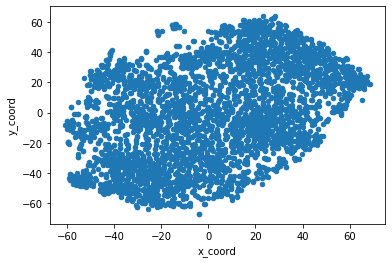

In [62]:
tsne_vectors.plot(kind = 'scatter', x = 'x_coord', y = 'y_coord')

In [63]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.io.export import file_html

output_notebook()

Loading BokehJS ...

In [64]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

# UMAP clustering

In [65]:
umap_filepath = '../models/nupepa_umap.model'
umap_vectors_filepath = '../models/umap_vectors.npy'

In [75]:
from umap import UMAP

In [89]:
if from_scratch or not os.path.exists(umap_filepath):
    
    umap = UMAP()
    umap_vectors = umap.fit_transform(dist_matrix.values[:, 1:])
    
    with open(umap_filepath, 'wb') as f:
        pickle.dump(umap, f)

    pd.np.save(umap_vectors_filepath, umap_vectors)

else:
    with open(umap_filepath, 'rb') as f:
        tsne = pickle.load(f)

umap_vectors = pd.np.load(umap_vectors_filepath)

umap_vectors = pd.DataFrame(umap_vectors,
                            index=pd.Index(dist_matrix.index),
                            columns=[u'x_coord', u'y_coord'])

umap_vectors['word'] = dist_matrix['word']

In [90]:
umap_vectors.reset_index(drop=True).to_csv("../data/umap.csv", index = False)

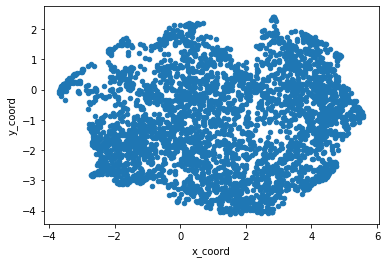

In [91]:
umap_vectors.plot(kind = 'scatter', x = 'x_coord', y = 'y_coord')

In [93]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(umap_vectors)

# create the plot and configure the
# title, dimensions, and tools
umap_plot = figure(title=u'UMAP Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
umap_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
umap_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
umap_plot.title.text_font_size = value(u'16pt')
umap_plot.xaxis.visible = False
umap_plot.yaxis.visible = False
umap_plot.grid.grid_line_color = None
umap_plot.outline_line_color = None

# engage!
show(umap_plot);

# K-Means Clustering

Next we can run K-Means Clustering on the word vectors to arrange them into topics. We want to automate the model so we can find the best $K$.

In [95]:
word_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ka,0.113737,0.067497,0.199300,-0.066927,-0.311902,0.098159,0.174789,0.178513,0.006809,0.059174,...,-0.021225,0.117263,0.035140,-0.026479,-0.059546,-0.041601,-0.016269,0.072015,-0.068188,0.040350
i,0.108316,0.090787,0.082445,-0.153513,-0.329411,0.012193,0.083741,0.158840,-0.044767,-0.025209,...,-0.074405,0.121770,0.051853,-0.024868,-0.061193,-0.155318,0.075649,0.084635,0.038320,0.094147
o,0.128414,0.020390,0.081826,-0.149738,-0.336329,0.127242,0.121222,0.204398,-0.057485,-0.014062,...,-0.046673,0.074254,0.093378,-0.095736,-0.051427,-0.187922,0.009772,0.107776,-0.082116,0.072461
a,0.089356,0.133908,0.098299,-0.032628,-0.382953,0.097713,0.122080,0.135626,-0.102162,-0.007020,...,-0.034968,0.125618,0.086496,-0.027165,-0.003198,-0.158231,0.032509,0.055055,-0.138669,0.072960
e,0.119663,0.142495,0.007431,-0.075808,-0.323129,0.054208,0.074768,0.070304,-0.086060,0.005673,...,-0.091319,0.037666,0.056726,0.100748,-0.160751,-0.201334,0.035196,-0.035268,0.025806,0.092337


In [96]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# k means determine k
distortions = []
K = range(1,500)
for k in K:
    print("\rRunning model {} out of {}".format(k+1, max(K)), end = '')
    kmeanModel = KMeans(n_clusters=k).fit(word_vectors.values)
    kmeanModel.fit(word_vectors.values)
    distortions.append(sum(np.min(cdist(word_vectors, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / word_vectors.shape[0])

Running model 500 out of 499

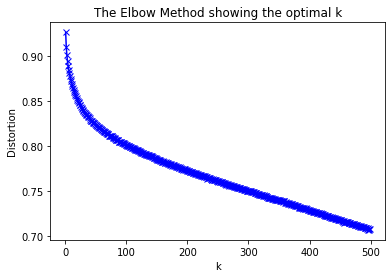

In [130]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

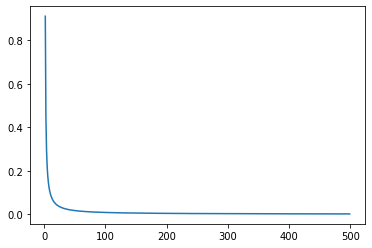

In [125]:
plt.plot(K, distortions / np.arange(max(K)))

In [126]:
from kneed import KneeLocator

In [127]:
kn = KneeLocator(
    np.arange(max(K)),
    distortions,
    curve='convex',
    direction='decreasing',
    interp_method='interp1d',
)

print(kn.knee)

497
